<a href="https://colab.research.google.com/github/gnurt2041/Football-Match-Analysis/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Yolov5 model for Football-Match-Analysis project

### Connect this colab notebook with Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Check hardware info (GPU, RAM)

In [2]:
!nvidia-smi

Tue Jul  4 05:31:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
import re
with open('/proc/meminfo') as f:
    meminfo = f.read()
matched = re.search(r'^MemTotal:\s+(\d+)', meminfo)
if matched:
    mem_total_gB = int(matched.groups()[0])*1e-6
if mem_total_gB > 20:
  cache_store = 'ram'
else:
  cache_store = 'disk'
print(f'For faster training you should use --cache {cache_store}')

For faster training you should use --cache ram


Get root direction

In [16]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Download dataset from my google drive and unzip into the google colab disk

In [17]:
%cd /{HOME}
!gdown https://drive.google.com/uc?id=1_3lJJOj0nqNNmTtiUBIUpG1-NPN6-foL&export=download
!7z x dataset.zip

/content
Downloading...
From: https://drive.google.com/uc?id=1_3lJJOj0nqNNmTtiUBIUpG1-NPN6-foL
To: /content/dataset.zip
100% 463M/463M [00:07<00:00, 58.9MB/s]

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 462970422 bytes (442 MiB)

Extracting archive: dataset.zip
 73% 4096 Open              --
Path = dataset.zip
Type = zip
Physical Size = 462970422

  0%      4% 121 - dataset/train/images/0115.jpg                                          9% 246 - dataset/train/images/0239.jpg                                         14% 364 - dataset/train/images/0356.jpg

Print an image to check everything is ok

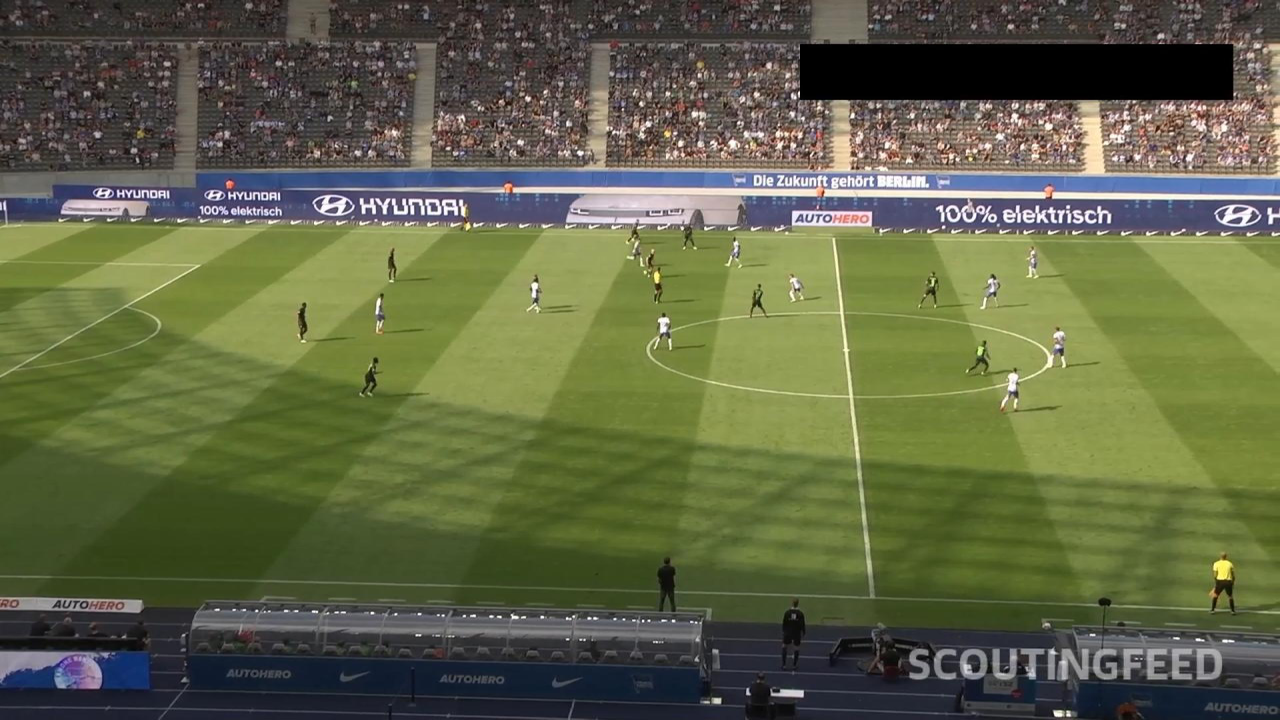

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
ran_idx = np.random.randint(0,5)
for subdir,dirs,files in os.walk('/content/dataset/valid'):
  for idx,file in enumerate(files):
    if file[-3:] == 'txt':
      break
    else:
      if idx == ran_idx:
        test_file = subdir + '/' + file
        break
img = Image.open(test_file)
img = img.resize((1280,720))
img.show()

## Clone the yolov5 github from ultralytics into your drive

In [ ]:
%cd {HOME}/drive/MyDrive/
!git clone https://github.com/ultralytics/yolov5

/content/drive/MyDrive
fatal: destination path 'yolov5' already exists and is not an empty directory.


Install requirements packages to run yolov5

In [ ]:
%cd {HOME}/drive/MyDrive/yolov5
!pip install -qr requirements.txt

import utils
display = utils.notebook_init()

/content/drive/MyDrive/yolov5


In [ ]:
%cd {HOME}/drive/MyDrive/yolov5
!python train.py \
  --weights yolov5x6.pt \
  --data /content/dataset/data.yaml \
  --hyp hyp.custom.yaml \
  --img 1280 \
  --batch-size -1 \
  --epochs 300 \
  --cache ram \
  --name yolov5x6_tracking \
  --exist-ok